In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from sklearn.datasets import load_iris
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.cross_validation import train_test_split
import numpy as np

from sklearn_evaluation.model_results import ClassificationModelResults

In [19]:
iris = load_iris()
X = iris.data
y = (iris.target == 0).astype(int) #Convert to binary classification

# Add noisy features
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
n_noisy = 800
X = np.c_[X, random_state.randn(n_samples, n_noisy)]

# Split into training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5, random_state=random_state)

iris.feature_names.extend(['noisy_feature_{}'.format(n) for n in range(n_noisy)])
feature_names = iris.feature_names
target_names = [iris.target_names[0], 'non-'+iris.target_names[0]]

ext = ExtraTreesClassifier()
ext.fit(X_train, y_train)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [20]:
mr = ClassificationModelResults(model=ext,
                                y_true=y_test,
                                y_pred=ext.predict(X_test),
                                y_score=ext.predict_proba(X_test)[:,1],
                                feature_names=feature_names,
                                target_names=target_names)

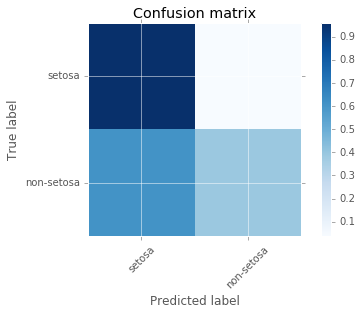

In [21]:
mr.plots.confusion_matrix(normalize=True)

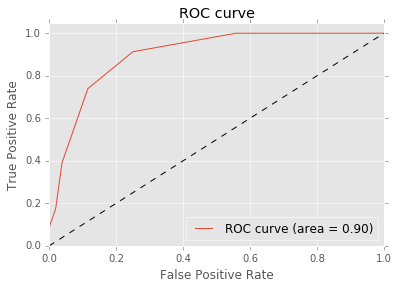

In [22]:
mr.plots.roc()

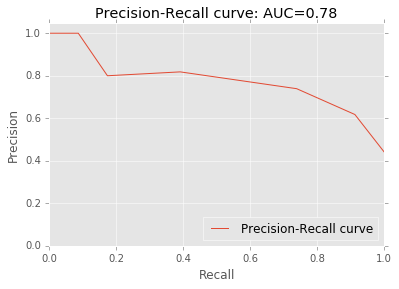

In [23]:
mr.plots.precision_recall()

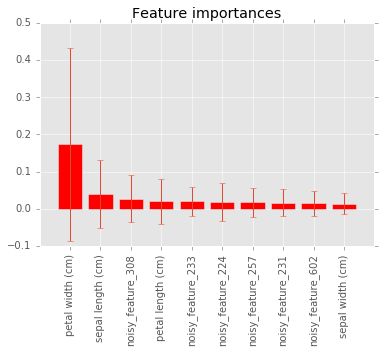

In [24]:
mr.plots.feature_importances(n=10)

In [25]:
mr.tables.feature_importances(n=10)

name,importance,std
petal width (cm),0.172695,0.258257
sepal length (cm),0.0406002,0.0914889
noisy_feature_308,0.0270593,0.0632116
petal length (cm),0.0201513,0.0604539
noisy_feature_233,0.0194624,0.0392454
noisy_feature_224,0.0169683,0.050905
noisy_feature_257,0.0168435,0.0383143
noisy_feature_231,0.0164466,0.0356596
noisy_feature_602,0.0147644,0.0334715
sepal width (cm),0.0139219,0.0279153
